1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform

2)

In [3]:
data = pd.read_csv('cardiaque.csv')
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,no,2.3,0,0,1,more chance
1,37,M,2,130,250,0,1,187,no,3.5,0,0,2,more chance
2,41,F,1,130,204,0,0,172,no,1.4,2,0,2,more chance
3,56,M,1,120,236,0,1,178,no,0.8,2,0,2,more chance
4,57,F,0,120,354,0,1,163,yes,0.6,2,0,2,more chance


3)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

il n'y pas de valeurs manquantes

4)

In [4]:
data_1= pd.read_csv('cardiaque_modifie.csv')
data_1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145.0,NaN,1,0,150.0,no,2.3,0.0,0.0,1.0,more chance
1,37,M,2,130.0,250,0,1,NaN,no,3.5,0.0,0.0,2.0,more chance
2,41,F,1,130.0,204,0,0,172.0,no,1.4,2.0,0.0,2.0,more chance
3,56,M,1,NaN,236,0,1,178.0,no,0.8,2.0,0.0,2.0,more chance
4,57,F,0,120.0,NaN,0,1,163.0,yes,0.6,2.0,0.0,2.0,more chance


In [5]:
data_1.isnull().sum()

age         0
sex         0
cp          0
trtbps      5
chol        4
fbs         0
restecg     0
thalachh    5
exng        1
oldpeak     0
slp         1
caa         1
thall       1
output      0
dtype: int64

In [9]:
data_1.dropna(inplace=True)  #on a enlevé toutes les colonnes où il y avait des valeurs manquantes
data_1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,F,1,130.0,204,0,0,172.0,no,1.4,2.0,0.0,2.0,more chance
6,56,F,1,140.0,294,0,0,153.0,no,1.3,1.0,0.0,2.0,more chance
8,52,M,2,172.0,199,1,1,162.0,no,0.5,2.0,0.0,3.0,more chance
10,54,M,0,140.0,239,0,1,160.0,no,1.2,2.0,0.0,2.0,more chance
11,48,F,2,130.0,275,0,1,139.0,no,0.2,2.0,0.0,2.0,more chance


5)

In [193]:
# combinaison de la methode fit et de la methode transform (fit permets de transformer une des string en entier avec une valeur décimal unique,
# transform permets d'appliquer cette methode a l'ensemble des données fourni (pour les données future aussi))
# C'est de l'encodage
from sklearn import preprocessing
transformer_colonne = preprocessing.LabelEncoder()
data.output = transformer_colonne.fit_transform(data.output)
data.sex = transformer_colonne.fit_transform(data.sex) 
data.exng = transformer_colonne.fit_transform(data.exng)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
age = data.age
sex = data.sex
chest_pain = data.cp
tension_arteriel = data.trtbps
chol = data.chol
glycemie = data.fbs
electro_cardio = data.restecg
frequence_cardiaque_max = data.thalachh
angine = data.exng
oldpeak = data.oldpeak
chance = data.output

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


6)

<Figure size 640x480 with 0 Axes>

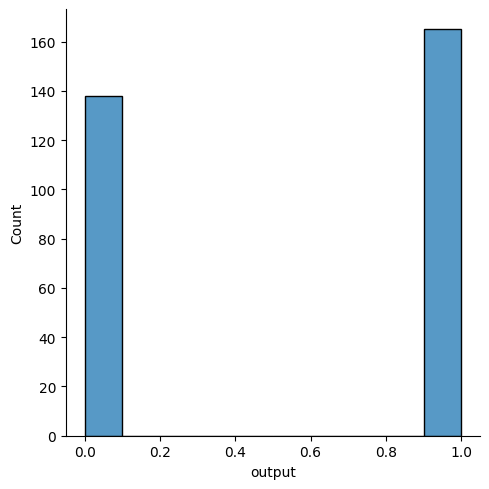

In [32]:
plt.figure()
sns.displot(data = data, x= chance)
plt.show()

Observations :
- les chances d'avoir ou de ne pas avoir d'arrêt cardiaque sont à peu pret proportionnelles.
140 personnes n'ont pas eues d'arrêt cardiaque contre 160 qui en ont eues.


<Figure size 640x480 with 0 Axes>

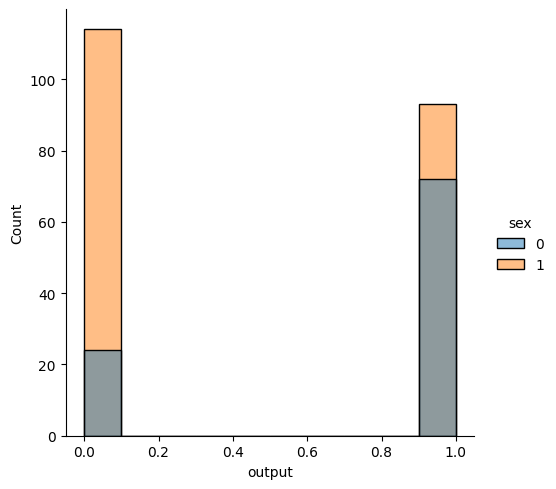

In [13]:
plt.figure()
sns.displot(data = data, x= chance, hue = sex)
plt.show()

Observations : 
- Les hommes ont bien plus de chances de faire un arrêt cardiaque comparait aux femmes. En effet pour 90 hommes tester 70 on fait un arrêt cardiaque. Les femmes quant à elles, ont fait un peu plus de 20 arrêt pour environ 110 femmes 

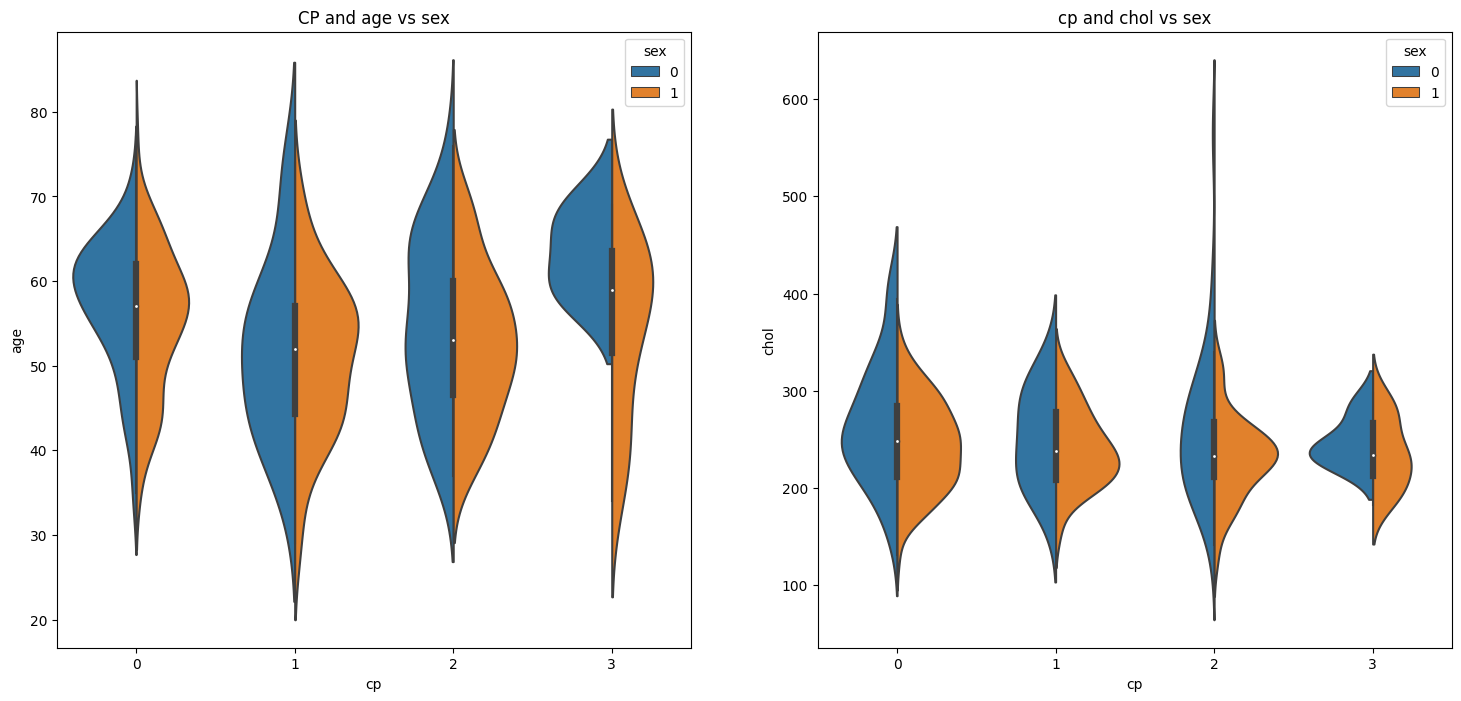

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=data, x= chest_pain ,y= age, hue= sex, split=True, ax=ax[0])
ax[0].set_title('CP and age vs sex')
sns.violinplot(data=data, x= chest_pain, y= chol , hue= sex, split=True, ax=ax[1])
ax[1].set_title('cp and chol vs sex')
plt.show()

Obervations :
graphique 1 : 
- Les douleurs au coeur (cp) ont une distrubution normale.
- Les hommes ont des douleurs de niveau 3 à partir de 50ans tandis que pour les femmes les douleurs de niveau 3 arrivent à tout age

graphique 2 : 
- La proportion de douleurs de niveau 2 avec un cholestérol entre 200 est plus élevé chez les hommes que chez les femmes
- La proportion de femmes avec un cholestérol entre 200 et 300 et des douleurs au coeur de niveau 3 est bien plus élevé que chez les hommes.




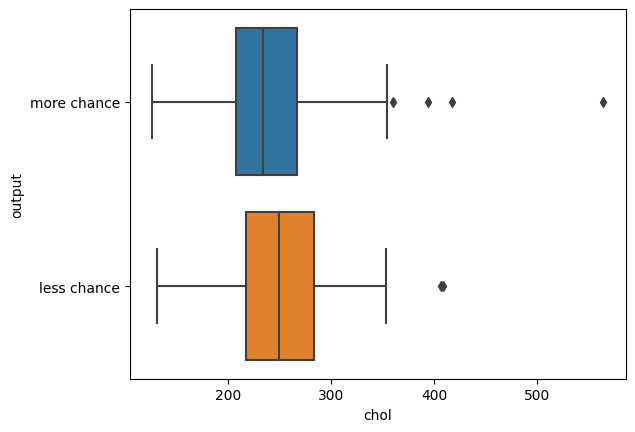

In [35]:
plt.figure()
sns.boxplot(data = data, x = chol, y = chance)
plt.show()

- Boîte à moustache des chances de faire une crise cardiaque suivant le cholestérol.

<Figure size 640x480 with 0 Axes>

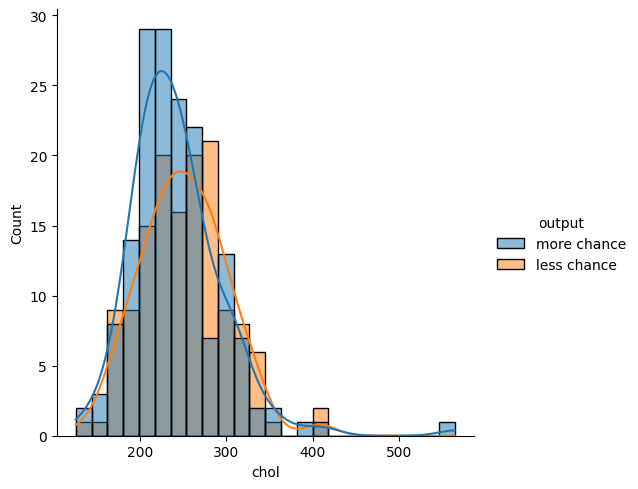

In [40]:
plt.figure()
sns.displot(data = data, x= chol, hue = chance, kde= True)
plt.show()

Observations :

- Le cholestérol n'as pas d'impact sur les chances de faire une crise cardiaque. Les courbes de distributions des chances de faire une crise sont presque superposées.

<Figure size 640x480 with 0 Axes>

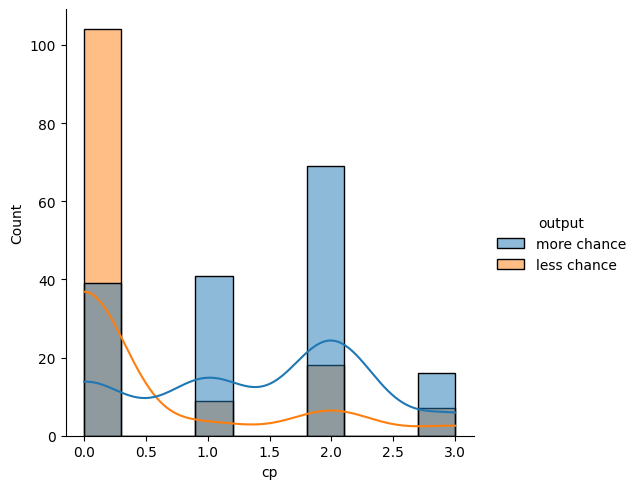

In [41]:
plt.figure()
sns.displot(data = data, x= chest_pain , hue = chance, kde= True)
plt.show()

Observations : 
- On peut voir que la courbe de distribution de chance d'avoir une crise cardiaque et supérieur à celle de ne pas en avoir lorsque l'on commence à avoir des douleurs au coeur. Les chances de faire une crise cardiaque sont d'autant plus forte lorsque les douleurs au coeur atteigne le niveaux 2.

<Figure size 640x480 with 0 Axes>

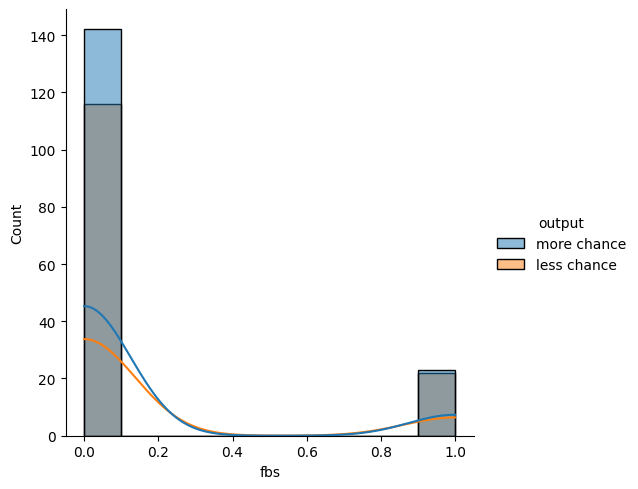

In [47]:
plt.figure()
sns.displot(data = data, x= glycemie , hue = chance, kde= True)
plt.show()

Observations :
- La glycémie (taux de sucre), n'a pas d'impact sur les possibilitées d'avoir une crise cardiaque. En effet les 2 courbes de distrubutions sur les chances d'avoir une crise cardiaque sont quasiment égales.


<Figure size 640x480 with 0 Axes>

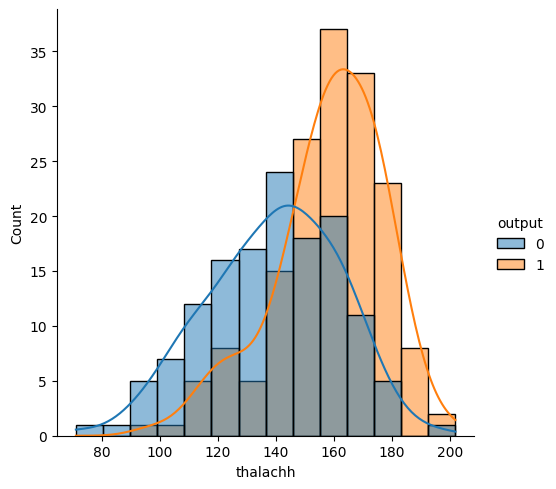

In [11]:
plt.figure()
sns.displot(data = data, x= frequence_cardiaque_max , hue = chance, kde= True)
plt.show()

Observations :
- Les chances d'avoir une crise cardiaque sont plus forte lorsque dépasse les 140battements par minutes (thalachh). En effet lorsqu'on dépasse ce seuil on peut voir que le courbe de distribution de chance d'avoir une crise cardiaque augmente tandis que celle de ne pas avoir de crise cardiaque baisse.

<Figure size 640x480 with 0 Axes>

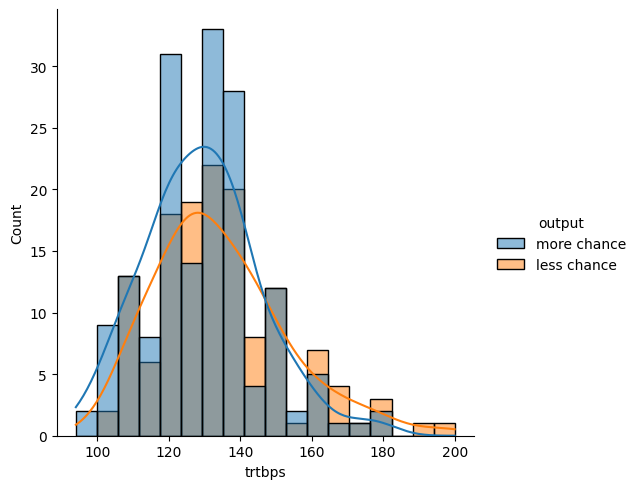

In [49]:
plt.figure()
sns.displot(data = data, x= tension_arteriel , hue = chance, kde= True)
plt.show()

Observations:
- Les chances d'avoir une crise cardiaque ne sont pas beaucoup plus fortes lorsque la pression artérielle et élevé. Les courbes de distribution des chances ce suivent quasiment.

<Figure size 640x480 with 0 Axes>

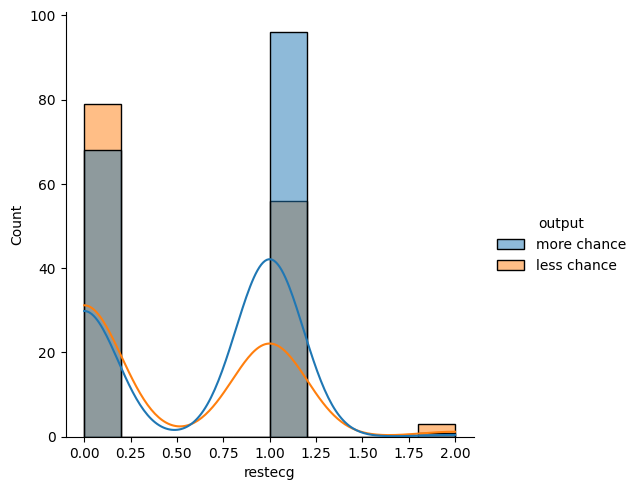

In [50]:
plt.figure()
sns.displot(data = data, x= electro_cardio , hue = chance, kde= True)
plt.show()

Observations : 
- Les chances d'avoir une crise cardiaque sont plus forte lorsque l'analyse de l'electro cardiogramme est jugée anormale.
En effet on peut voir que la courbe de distribution de chance d'avoir une crise cardiaque et bien supérieur à celle de ne pas en avoir 

<Figure size 640x480 with 0 Axes>

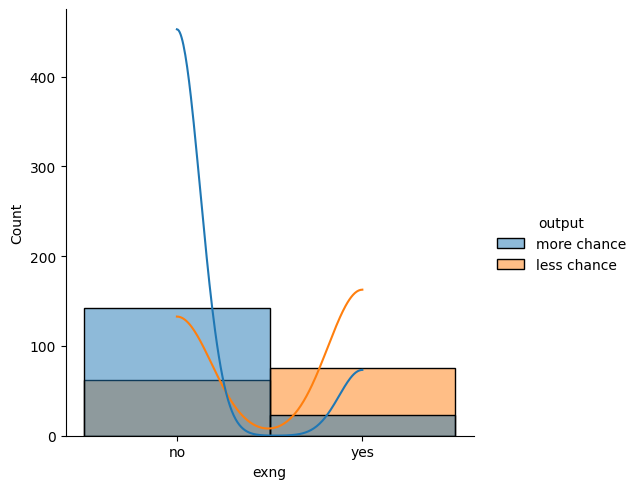

In [51]:
plt.figure()
sns.displot(data = data, x= angine , hue = chance, kde= True)
plt.show()

Observations :
- étonnament les chances de faire une crise cardiaque sont bien plus forte lorsque l'on a pas d'angine. (valeur abérante ?)

<Figure size 640x480 with 0 Axes>

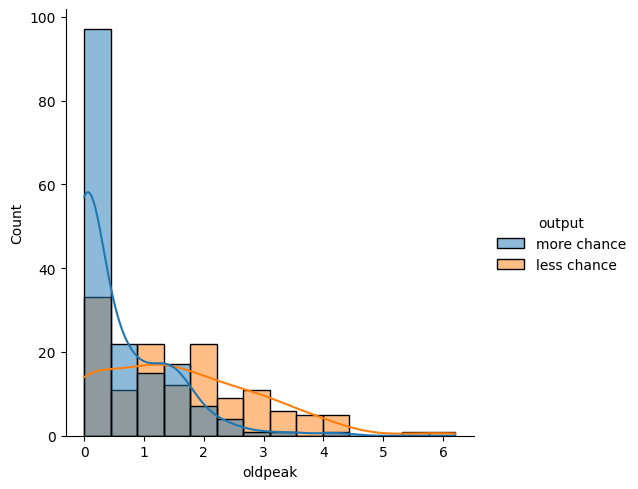

In [52]:
plt.figure()
sns.displot(data = data, x= oldpeak , hue = chance, kde= True)
plt.show()

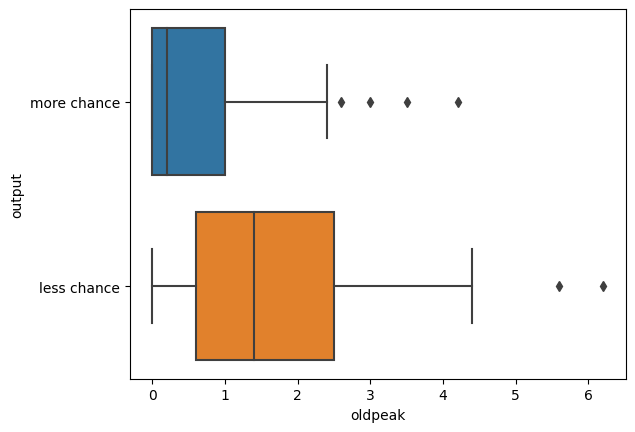

In [7]:
plt.figure()
sns.boxplot(data = data, x = oldpeak, y = chance)
plt.show()

<Figure size 640x480 with 0 Axes>

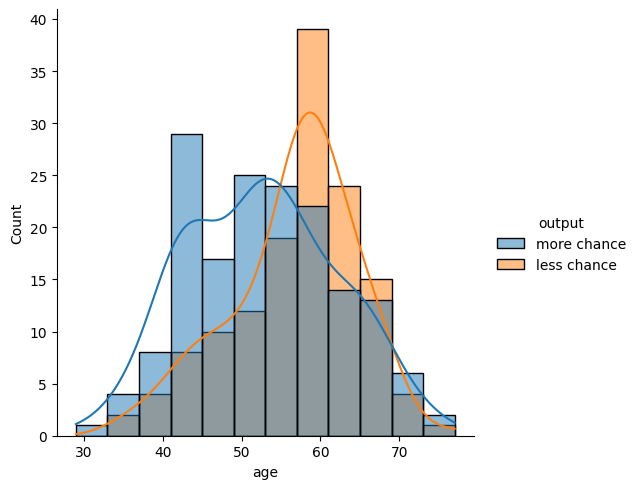

In [53]:
plt.figure()
sns.displot(data = data, x= age, hue = chance, kde= True)
plt.show()

Observations : 
- Les chances de faire une crise cardiaque augmentent entre 40 et 55ans, puis elles baissent progressivement.
- Entre 55 et 60 ans les chances de faire une crise cardiaque baissent.
- Après 60 ans les chances de faire une crise cardiaque suivant l'age retrouve une distribution normale et équitable.

En bref :
- les douleurs au coeur sont en corélation avec les chances d'avoir un arrêt cardiaque
- Le nombre de battement cardiaque sont en coréaltion avec les chances d'avoir un arrêt cardiaque
- L'analyse du cardiogramme est en corélation avec les chances d'avoir un arrêt cardiaque.

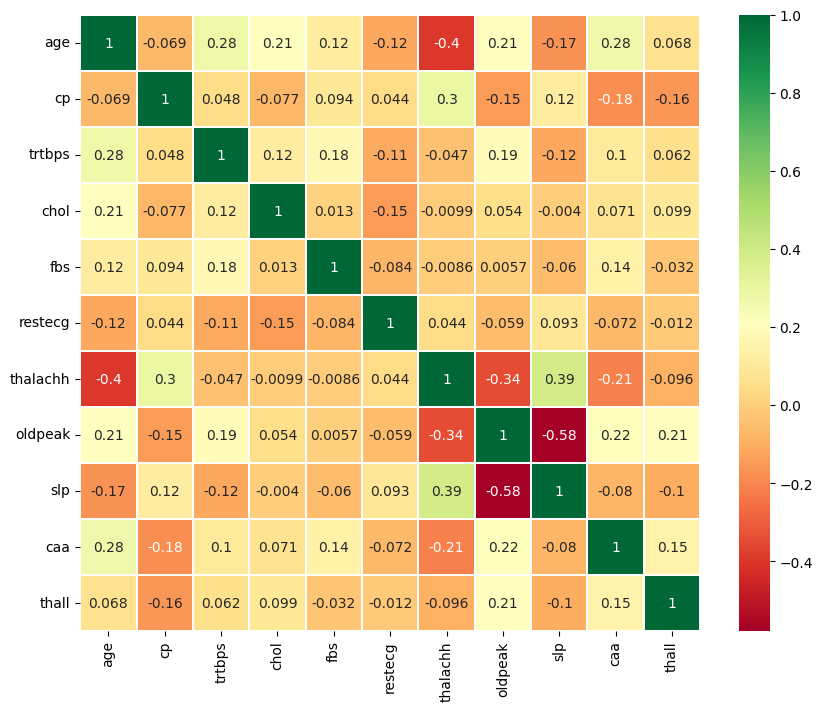

In [8]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Observations :
- Sur ce graphique numérique on peut voir toutes les colonnes de notre dataset et en observer les corélations entre elles. En effet en regardant le croisement entre une colonne en ordonné et une colonne en abscice on peut en déduire des corélations.
- Plus on est proche de 0 moins il y a de corélations, plus on est proche de 1 plus la corélation est forte. 
- Une corélation est dite positive si elle s'approche de 1 et négative si elle s'approche de -1.

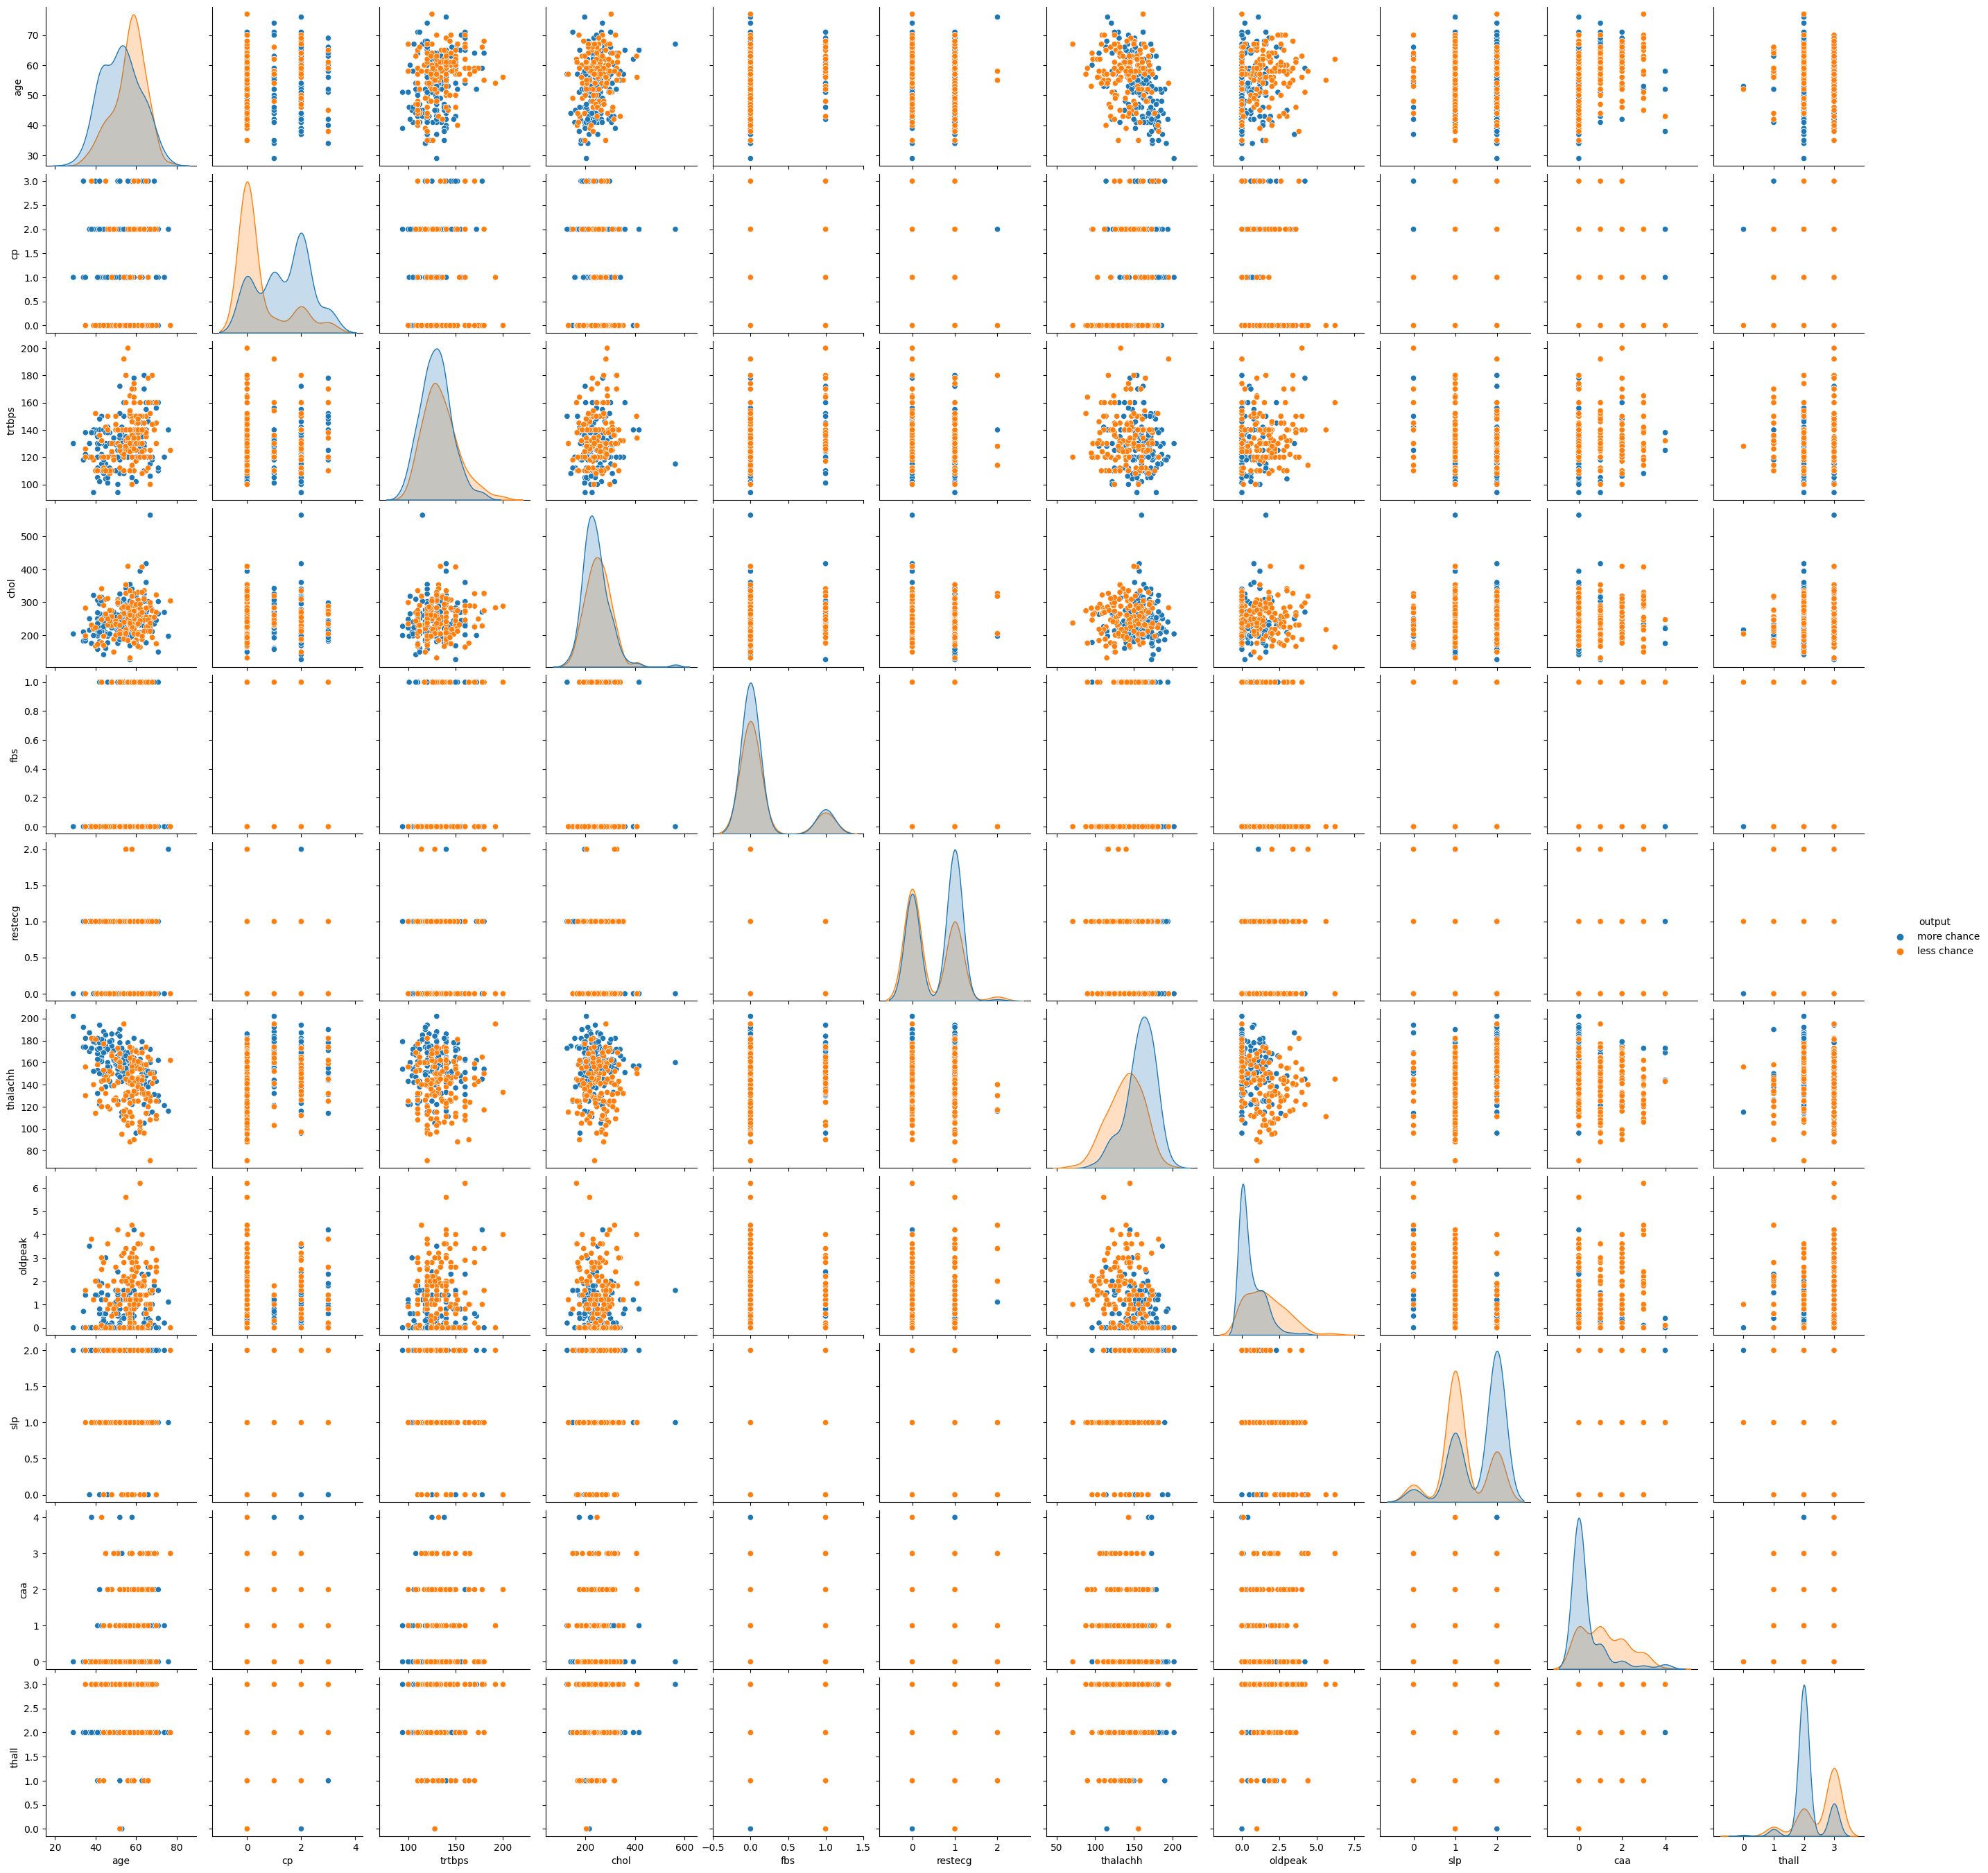

In [22]:
sns.pairplot( data, hue = "output")

Observations :
- On remarque les corélations, en fonction des chances de faire une crise cardiaque, comme sur le graphique au dessus mais cette fois ci avec avec des graphiques à courbes en diagonal (la meme forme que les matrices identitées ) ou à point sur le reste du tableau graphique.
- On remarque donc toutes les observations et corélations qu'on a faites précédemment.

7)

In [16]:
data.var(axis = 0)

age           82.484558
sex            0.217166
cp             1.065132
trtbps       307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalachh     524.646406
exng           0.220707
oldpeak        1.348095
slp            0.379735
caa            1.045724
thall          0.374883
output         0.248836
dtype: float64

Observations :
- Ici on regarde la variance de chacunes des colonnes de notre dataset. 
- On voit que certaines variable varie très peu (thall, fbs, restecg, slp)
- On voit que certaines variable varie beaucoup voir énormément ( age, trtbps, chol, thalachh)

In [10]:
from sklearn.feature_selection import VarianceThreshold #importation de l'outil necessaire pour selectionner nos variance
selector = VarianceThreshold( threshold= 1) 
# la variable selector est notre transformeur, on selectionne uniquement les variables avec une variance minimum de 1
selector.fit_transform(data)

array([[ 63. ,   3. , 145. , ..., 150. ,   2.3,   0. ],
       [ 37. ,   2. , 130. , ..., 187. ,   3.5,   0. ],
       [ 41. ,   1. , 130. , ..., 172. ,   1.4,   0. ],
       ...,
       [ 68. ,   0. , 144. , ..., 141. ,   3.4,   2. ],
       [ 57. ,   0. , 130. , ..., 115. ,   1.2,   1. ],
       [ 57. ,   1. , 130. , ..., 174. ,   0. ,   1. ]])

Notre dataset a était filtré pour selectionner uniquement les variable avec une variance qui nous intéresse.

In [11]:
selector.get_support() # Nous retourne un booléen pour nous dire quelles variables a étaient sélectionnées

array([ True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True, False, False])

La première, troisiéme, quatrième , cinquième etc variables ont était selectionnées.
La deuxième, sixième, septième, neuvième etc variables n'ont pas étaient selectionnées.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
chi2( data, chance)

(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297, 138.        ]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02, 7.28767973e-32]))

Observations :
- Le test de chi2 nous permets de voir (dans le premier array(tableau)) les catégories liées à l'ensemble(chance). Plus le nombre est élevé plus la variable est dépendante de notre argument (ici l'argument et output (chance)).
- On voit que la 3ème variable, la 10ème, la 12ème, et principalement la derniere (output (mais c'est normal les chances sont liées au chances)) et la 8ème (thalachh) sont liées à notre argument 'chance'(output).
- le data.info() en dessous permets de nous repérer
- le 2ème array représente les valeurs de probabilitées ( p.values)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
selector = SelectKBest(chi2, k= 5) 
# On va selection les 5 variable les plus dépendantes de l'argument chie 2, et l'argument k(le nombre de variable à selectionner)
selector.fit_transform(data, chance ) #comme on a mis l'argument chi2 il faut mettre 2 valeurs dans le fit_transform
selector.get_support()

array([False, False,  True, False, False, False, False,  True, False,
        True, False,  True, False,  True])

Comme prédemment avec la VarianceTreshold on peut voir si dessus grâce à un booléen les variables qui ont étaient selectionnées.

In [142]:
data_3 = pd.read_csv('cardiaque_dat.csv')
data_3.pop('chol')
data_3.pop('fbs')
data_3.pop('thall')
data_3.pop('exng')
data_3.pop('restecg')
data_3.pop ('age')
data_3.pop ('sex')
data_3.pop('caa')
data_3.pop('trtbps')
transformer_colonne = preprocessing.LabelEncoder()
data_3.sex = transformer_colonne.fit_transform(data.sex)
data_3.output = transformer_colonne.fit_transform(data.output)
data_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cp        303 non-null    int64  
 1   thalachh  303 non-null    int64  
 2   oldpeak   303 non-null    float64
 3   slp       303 non-null    int64  
 4   output    303 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 12.0 KB


J'ai recréer un fichier csv pour ne pas corompre le le fichier principal(cardiaque.csv), j'ai enlever les colonnes qui ne m'intéressé pas pour entrainer mon model

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_3, chance, test_size=0.2) 
#la ligne de code au-dessus nous permets d'entrainer notre IA on va prendre 80% des données pour l'entrainer et 20% pour tester notre IA
#les 20% de test correspondent à notre test_size(0,2) le reste étant notre phase d'entrainement
print('test set:', X_train.shape)
print('train set:', X_test.shape)

test set: (242, 5)
train set: (61, 5)


Text(0.5, 1.0, 'Test set')

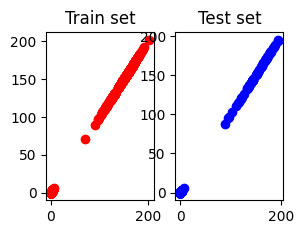

In [147]:
plt.figure()
plt.subplot(242)
plt.scatter(X_train[:], X_train[:], c= 'red')
plt.title('Train set')
plt.subplot(243)
plt.scatter(X_test[:], X_test[:], c= 'blue')
plt.title('Test set')

J'ai fais un graphique pour observer l'entrainement et le test.

In [166]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=1) # un voisin de 5 permets une precision de 86%
model.fit(X_train, y_train ) 
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Train score: 1.0
Test score: 0.8688524590163934


Evaluation du model :
- Le train score et de 100%
- Le test score obtient un résultat de 87% de precision

8)

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data_3)

array([[1.        , 0.60305344, 0.37096774, 0.        , 1.        ],
       [0.66666667, 0.88549618, 0.56451613, 0.        , 1.        ],
       [0.33333333, 0.77099237, 0.22580645, 1.        , 1.        ],
       ...,
       [0.        , 0.53435115, 0.5483871 , 0.5       , 0.        ],
       [0.        , 0.33587786, 0.19354839, 0.5       , 0.        ],
       [0.33333333, 0.78625954, 0.        , 0.5       , 0.        ]])

Normalisation des données quantitatives ( les mettres toutes à la même échelle), ça facilite l'apprentissage en machine learning

In [185]:
scaler.transform(X_test)

array([[0.66666667, 0.77862595, 0.        , 1.        , 1.        ],
       [0.        , 0.54198473, 0.4516129 , 0.5       , 0.        ],
       [0.        , 0.19083969, 0.35483871, 0.        , 0.        ],
       [0.        , 0.55725191, 0.19354839, 0.5       , 0.        ],
       [0.33333333, 0.6259542 , 0.20967742, 0.5       , 1.        ],
       [0.66666667, 0.60305344, 0.        , 1.        , 1.        ],
       [0.        , 0.18320611, 0.32258065, 0.5       , 0.        ],
       [0.33333333, 0.6870229 , 0.22580645, 0.5       , 1.        ],
       [0.66666667, 0.69465649, 0.08064516, 1.        , 1.        ],
       [0.        , 0.8778626 , 0.        , 1.        , 1.        ],
       [0.66666667, 0.54198473, 0.09677419, 0.5       , 0.        ],
       [0.        , 0.34351145, 0.51612903, 0.5       , 0.        ],
       [0.        , 0.83969466, 0.19354839, 0.5       , 1.        ],
       [0.33333333, 0.77099237, 0.03225806, 1.        , 1.        ],
       [0.        , 0.30534351, 0.

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data_3)

array([[ 1.97312292,  0.01544279,  1.08733806, -2.27457861,  0.91452919],
       [ 1.00257707,  1.63347147,  2.12257273, -2.27457861,  0.91452919],
       [ 0.03203122,  0.97751389,  0.31091206,  0.97635214,  0.91452919],
       ...,
       [-0.93851463, -0.37813176,  2.03630317, -0.64911323, -1.09345881],
       [-0.93851463, -1.51512489,  0.13837295, -0.64911323, -1.09345881],
       [ 0.03203122,  1.0649749 , -0.89686172, -0.64911323, -1.09345881]])

Standardisation, chaque variable a une moyenne à 0 et un écart-type égal à 1.

In [189]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(data_3)


array([[ 1.        , -0.09230769,  0.9375    , -1.        ,  0.        ],
       [ 0.5       ,  1.04615385,  1.6875    , -1.        ,  0.        ],
       [ 0.        ,  0.58461538,  0.375     ,  1.        ,  0.        ],
       ...,
       [-0.5       , -0.36923077,  1.625     ,  0.        , -1.        ],
       [-0.5       , -1.16923077,  0.25      ,  0.        , -1.        ],
       [ 0.        ,  0.64615385, -0.5       ,  0.        , -1.        ]])

Ici on soustrait nos données à la médiane de chaques variables que l'on divise cette fois-ci par l'interquartile de dnos données

                                                       
                                                       
                                                        _____
                                                      |  FIN  |
                                                        _____